# Churn Case Study

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]


<img src="https://images.pexels.com/photos/3078/home-dialer-siemens-telephone.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style="width:400px">

**Client**: Telco Company in the USA offering triple play (phone, internet and TV).

New competitor entered offering triple play, resulting in increased churn.

Want better way to spot potential churning customers and suggested actions what to do.

## **Assignment**

- Define the business problem
- Determine which evaluation metric you find appropriate:
   - accuracy
   - precision
   - recall
   - f1 score
- Determine which type of slice/segment/type of churn you are interested
- Run "data prep code"
- Use logistic regression to create 2-3 model specifications
  - model 1 (vanilla model): uses cleaned data as is, find best cutoff using chosen metric
  - model 2: create at least **2 new features** and add them to the model
  - model 3 (if time, a 'reach' model): increase the LASSO penalty to decrease the feature set
- Pick the "best" model and find the "best" threshold
- Use "best" model to identify the drivers of churn in your segment analysis and make recommendations for the company
- Each group will have 5 minutes to present their recommendations to the rest of the class. Make sure to share:
   - segment you chose
   - evaluation metric you chose based on the business problem
   - evaluation metric of "best" model's threshold & threshold
   - what drives churn and what are your recommendations
   - **if you had more time** what would you work on?

## Data

<img src="https://images.pexels.com/photos/53621/calculator-calculation-insurance-finance-53621.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style = "width:400px" >
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information 
     - how long they’ve been a customer (tenure is in months)
     - contract, payment method, paperless billing, monthly charges, and total charges
     - all "totals" are over the length of the contract
- Demographic info about customers – gender, age range, and if they have partners and dependents
- Usage
    - information about their usage patterns
    - again, usage totals are over length of contract

## Concept: Churn

#### Type of churn:

**Voluntary** – they left after contract was up

**Involuntary** – we fired them

**Early churn** – left early, broke contract

### Churn is a survival problem:
- Predicting who will churn next month is really hard
- Predicting who may churn over next 3 months is easier

<img src = "./img/funnel.png" style="width:800px">

There are many reasons to churn &#8594; **feature engineering is king**

### Solutions need to be tied to root problems

<img src = "./img/solution.png" style="width:800px">

### Different solutions have different time frames

<img src = "./img/time.png" style="width:800px">

## Remember:

#### You will not be paid to create intricate models
### You will be paid to **Solve Problems**

# Get Started!

## Part 1: Business problem

#### End Users:



#### True business problem:



#### Context:

- **False negative** 
    - **Outcome**:
- **False positive**
    - **Outcome**: 

## Part 2: Evaluation Metric
Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- Accuracy
- Precision
- Recall
- F1-Score

## Part 3: Segment choice

What type slice/segment/type of churn you are interested in?

## Part 4: Data Prep Code

In [14]:
# Import pacakges
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
telco = pd.read_csv(url_link)

# Drop nas
telco.dropna(inplace=True)

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(telco.drop(columns=['customerID','Churn']), np.where(telco.Churn =="Yes", 1, 0), test_size=0.33, random_state=42)

# Separate out numeric from categorical variables
cat_var = telco.select_dtypes(include='object')
cat_var.drop(columns=['customerID','Churn'], inplace = True)

num_var = telco.select_dtypes(exclude = 'object') 

# Encode categorical variables
ohc = OneHotEncoder(drop='first')
encoded_cat = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

# Reassemble entire training dataset
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_train.shape

encoded_cat = ohc.transform(X_test[cat_var.columns.tolist()]).toarray()
# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
# Reassemble entire training dataset
clean_X_test = pd.concat([X_test[num_var.columns.tolist()] , encoded], axis=1,  sort=False)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
pd.set_option('display.max_columns', None)

In [16]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'MaritalStatus', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'InternationalPlan', 'VoiceMailPlan',
       'NumbervMailMessages', 'TotalDayMinutes', 'TotalDayCalls',
       'TotalEveMinutes', 'TotalEveCalls', 'TotalNightMinutes',
       'TotalNightCalls', 'TotalIntlMinutes', 'TotalIntlCalls',
       'CustomerServiceCalls', 'TotalCall', 'TotalHighBandwidthMinutes',
       'TotalHighLatencyMinutes', 'TotalRevenue', 'Churn'],
      dtype='object')

In [11]:
telco.head()

,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,InternationalPlan,VoiceMailPlan,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,No,0,168.8,137,241.4,107,204.8,106,15.5,4,0,354,705,119,593.3,No
1,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,0,122.2,112,131.7,94,169.5,106,10.3,9,5,326,292,75,280.9,Yes
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),No,Yes,36,178.7,134,178.6,102,126.8,82,8.0,4,2,324,1840,257,571.5,No
3,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,No,0,190.2,68,262.2,64,130.0,92,8.8,4,0,228,1389,180,7904.3,No
4,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,0,67.7,68,195.7,86,236.5,137,12.0,2,1,294,170,1,340.4,No


In [2]:
clean_X_train.columns

Index(['SeniorCitizen', 'tenure', 'NumbervMailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes',
       'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall',
       'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue',
       'gender_Male', 'MaritalStatus_Yes', 'Dependents_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
 

In [12]:
clean_X_train.head()

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue,gender_Male,MaritalStatus_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternationalPlan_Yes,VoiceMailPlan_Yes
0,0,1,0,97.2,88,155.6,85,261.6,105,12.4,5,0,283,0,0,19.1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,58,34,138.8,80,142.0,108,183.8,77,11.8,7,1,273,2689,161,5305.1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0,1,0,179.7,128,299.8,92,185.3,120,7.6,3,1,344,0,0,19.9,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,4,0,298.4,78,270.5,142,107.3,84,12.2,2,0,306,666,173,299.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,1,0,189.3,77,155.9,128,186.0,83,7.4,3,0,291,0,0,19.8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Part 5: Create models

In [19]:
import pandas as pd
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

In [20]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(clean_X_train)
X_test_scaled = scaler.transform(clean_X_test)

In [22]:
logreg = LogisticRegression()
vanilla_mod = logreg.fit(X_train_scaled, y_train)

y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

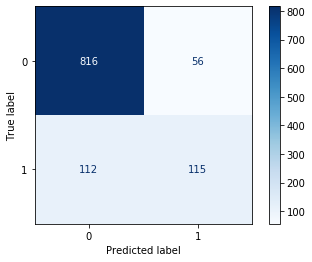

In [24]:
plot_confusion_matrix(logreg, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, 
                      values_format=".3g") 
plt.show()

# Recall = TP/ (TP+FN) = 115/ (112+115)

In [36]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [37]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test):.4f}")
    print("*" * 15)


Accuracy:
TRAIN: 0.8694
TEST: 0.8471
***************
Recall:
TRAIN: 0.5399
TEST: 0.5066
***************
Precision:
TRAIN: 0.7077
TEST: 0.6725
***************
F1-Score:
TRAIN: 0.6125
TEST: 0.5779
***************


Class_weight = 'balanced'

In [25]:
logreg2 = LogisticRegression(class_weight='balanced')
balanced_mod = logreg2.fit(X_train_scaled, y_train)

y_pred_train_bl = logreg2.predict(X_train_scaled)
y_pred_test_bl = logreg2.predict(X_test_scaled)

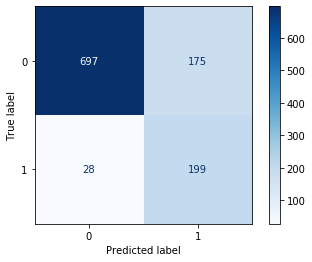

In [27]:
plot_confusion_matrix(logreg2, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, 
                      values_format=".3g") 
plt.show()


In [29]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train, y_pred_train_bl):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test_bl):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8214
TEST: 0.8153
***************
Recall:
TRAIN: 0.8779
TEST: 0.8767
***************
Precision:
TRAIN: 0.5194
TEST: 0.5321
***************
F1-Score:
TRAIN: 0.6527
TEST: 0.6622
***************


In [30]:
logreg.predict_proba(X_test_scaled)

array([[9.99462772e-01, 5.37227568e-04],
       [9.15245266e-01, 8.47547335e-02],
       [1.38155502e-01, 8.61844498e-01],
       ...,
       [8.57429762e-01, 1.42570238e-01],
       [9.55619383e-01, 4.43806167e-02],
       [9.93883816e-01, 6.11618422e-03]])

In [34]:
logreg2.predict_proba(X_test_scaled)[:, 1]

array([0.00215822, 0.29496807, 0.97617683, ..., 0.36929697, 0.16803325,
       0.02343835])

## Part 6: Pick model & find best threshold

In [ ]:
# plot the probability of churn.

In [ ]:
y_train_pred_probs = logreg2.predict_proba(X_test_scaled)[:, 1]

In [ ]:
metrics_df = pd.DataFrame(columns=['threshold', 'train_acc', 'test_acc'])

for x in np.arange(y_train_pred_probs.min(), y_train_pred_probs.max(), 0.01):
    placeholder = []
    threshold = x
    y_pred_train = np.where(y_train_pred_probs > x, 1, 0)
    r_pred_test = np.where(y_test_pred_probs > x, 1, 0)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, r_pred_test)
    placeholder = [threshold, train_acc, test_acc]
    sample_S = pd.Series(placeholder, index=[
                         'threshold', 'train_acc', 'test_acc'])
    metrics_df = metrics_df.append(sample_S, ignore_index=True)

## Part 7: What drives churn?

## Part 8: What are your recommendations?